# ANLY590 HW3

### Jingyu Zhang
### Team members: Qian Yi, Xiangyu Hu

### 1.Autoencoder

In [66]:
from keras.datasets import fashion_mnist
from keras.layers import Input, Dense, Conv1D,Conv2D,GlobalMaxPooling1D, MaxPooling2D, UpSampling2D,Dropout,Flatten, Embedding, LSTM
from keras.models import Model,Sequential
from keras import backend as K
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.utils import np_utils  
from keras.preprocessing.image import img_to_array, array_to_img
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import SGD, Adam, RMSprop

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from string import printable
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from keras import regularizers

In [6]:
# Load fashion mnist data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# normalize data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [7]:
# Add Layers from the blog
input_img = Input(shape=(32, 32, 3))  

# Convolutional autoencoder: 
x = Conv2D(filters=32, kernel_size=(3,3),padding="same", activation='relu')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, kernel_size = (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)


x = Conv2D(8, kernel_size =  (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

x = Conv2D(8, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(32, kernel_size = (3, 3), activation='relu',padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(3, kernel_size = (3, 3), activation='relu', padding='same')(x)


autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', metrics=['accuracy'], loss='mean_squared_error')

autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 8)         2312      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0   

In [8]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 53s 1ms/step - loss: 0.0311 - accuracy: 0.4831 - val_loss: 0.0182 - val_accuracy: 0.6010
Epoch 2/10
50000/50000 [==============================] - 52s 1ms/step - loss: 0.0168 - accuracy: 0.6098 - val_loss: 0.0162 - val_accuracy: 0.6196
Epoch 3/10
50000/50000 [==============================] - 51s 1ms/step - loss: 0.0153 - accuracy: 0.6192 - val_loss: 0.0148 - val_accuracy: 0.6319
Epoch 4/10
50000/50000 [==============================] - 50s 1ms/step - loss: 0.0145 - accuracy: 0.6258 - val_loss: 0.0142 - val_accuracy: 0.6288
Epoch 5/10
50000/50000 [==============================] - 50s 1ms/step - loss: 0.0138 - accuracy: 0.6486 - val_loss: 0.0136 - val_accuracy: 0.6649
Epoch 6/10
50000/50000 [==============================] - 51s 1ms/step - loss: 0.0134 - accuracy: 0.6673 - val_loss: 0.0132 - val_accuracy: 0.6703
Epoch 7/10
50000/50000 [==============================] - 50s 995us/

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


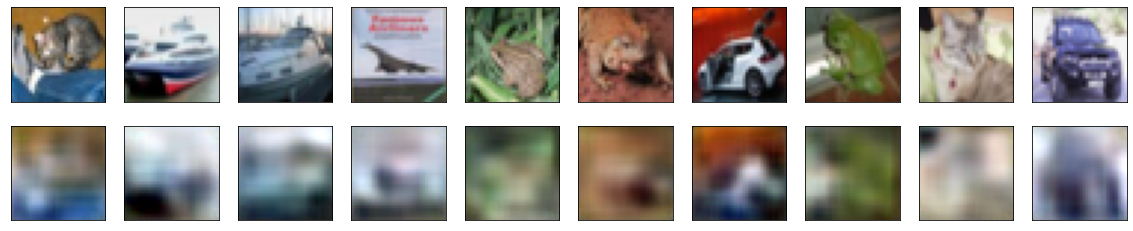

In [11]:
#decode image and visualize
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

### 2.1 Deep CNN

In [12]:
tf.one_hot(y_train,depth=10)

<tf.Tensor: shape=(50000, 1, 10), dtype=float32, numpy=
array([[[0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 1.]],

       [[0., 0., 0., ..., 0., 0., 1.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 1.]],

       [[0., 1., 0., ..., 0., 0., 0.]],

       [[0., 1., 0., ..., 0., 0., 0.]]], dtype=float32)>

In [13]:
model1 = tfk.Sequential()
model1.add(tfkl.Conv2D(64,kernel_size=(3,3),strides=1,input_shape=(32,32,3),padding='valid',activation='relu'))
model1.add(tfkl.MaxPool2D(pool_size=(2,2)))
model1.add(tfkl.Dropout(0.3))
model1.add(tfkl.Conv2D(32,kernel_size=(3,3),strides=1,padding='valid',activation='relu'))
model1.add(tfkl.MaxPool2D(pool_size=(2,2)))
model1.add(tfkl.Dropout(0.3))
model1.add(tfkl.Flatten())
model1.add(tfkl.Dense(64,activation='relu'))
model1.add(tfkl.Dropout(0.5))
model1.add(tfkl.Dense(10,activation='softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

In [14]:
# In this model, I choose the kernel size is (3,3) and the strides=1,padding is valid, and the depth is 7.

In [15]:
model1.compile(optimizer=tfk.optimizers.RMSprop(),loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
from keras.utils import to_categorical

In [17]:
train_label = to_categorical(y_train)

In [18]:
test_label = to_categorical(y_test)

In [19]:
results2 = model1.fit(x_train,train_label,steps_per_epoch=100,epochs=20,batch_size=16,validation_data=(x_test,test_label))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
 1600/50000 [..............................] - ETA: 1:26 - loss: 1.6720 - accuracy: 0.3869 - val_loss: 1.5126 - val_accuracy: 0.4711

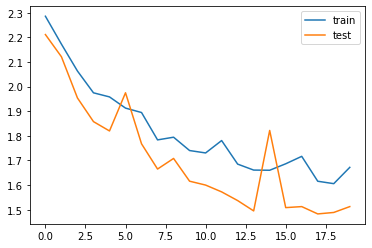

In [20]:
plt.plot(results2.history['loss'])
plt.plot(results2.history['val_loss'])
plt.legend(labels=['train','test'])

### 2.2 Transfer learning

In [21]:
from tensorflow.keras.applications import VGG16

In [22]:
conv_base = VGG16(weights = 'imagenet', include_top = False, input_shape = (32,32,3))
conv_base.summary()

58892288/58889256 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
______________________________________________________________

In [23]:
model2 = tfk.Sequential()
model2.add(conv_base)
model2.add(tfkl.Flatten())
model2.add(tfkl.Dense(64, activation='relu'))
model2.add(tfkl.Dropout(0.5))
model2.add(tfkl.Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                32832     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 14,748,170
Trainable params: 14,748,170
Non-trainable params: 0
_________________________________________________________________


In [24]:
conv_base.trainable = False
len(model2.trainable_weights)

4

In [25]:
model2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
results3 = model2.fit(x_train, train_label, epochs=5, batch_size=32,validation_data=(x_test,test_label))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 166s 3ms/sample - loss: 1.6730 - accuracy: 0.4108 - val_loss: 1.3645 - val_accuracy: 0.5265
Epoch 2/5
50000/50000 [==============================] - 168s 3ms/sample - loss: 1.4643 - accuracy: 0.4894 - val_loss: 1.3094 - val_accuracy: 0.5491
Epoch 3/5
50000/50000 [==============================] - 164s 3ms/sample - loss: 1.4184 - accuracy: 0.5157 - val_loss: 1.2854 - val_accuracy: 0.5548
Epoch 4/5
50000/50000 [==============================] - 162s 3ms/sample - loss: 1.4044 - accuracy: 0.5215 - val_loss: 1.2707 - val_accuracy: 0.5659
Epoch 5/5
50000/50000 [==============================] - 167s 3ms/sample - loss: 1.3959 - accuracy: 0.5296 - val_loss: 1.2716 - val_accuracy: 0.5643


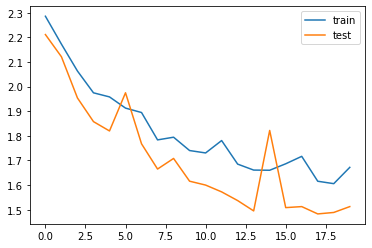

In [27]:
plt.plot(results2.history['loss'])
plt.plot(results2.history['val_loss'])
plt.legend(labels=['train','test'])

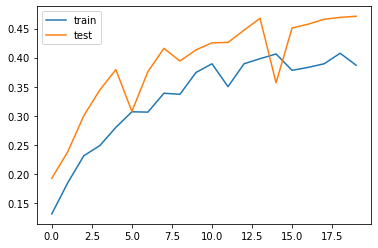

In [28]:
plt.plot(results2.history['accuracy'])
plt.plot(results2.history['val_accuracy'])
plt.legend(labels=['train','test'])

### 3. Text classification

### 3.1 RNNN

In [67]:
spam = pd.read_csv('SPAM_detection.csv')
spam.head()

,Message,category_val
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [68]:
x = spam['Message'].copy()
y = spam['category_val']

In [69]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords


def data_cleaner(text):
    # remove urls
    text = re.sub(r'http\S+', ' ', text)
    # remove html tags
    text = re.sub(r'<.*?>',' ', text)
    # remove digits
    text = re.sub(r'\d+',' ', text)
    #removing stop words
    text = text.split()
    text = " ".join([word for word in text if not word in stop_words])
    return text
stop_words = stopwords.words('english')
x = x.apply(data_cleaner)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jingyuzhang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
# tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# try word-level embedding 
tokenizer = Tokenizer(char_level=False)
tokenizer.fit_on_texts(x)
x = tokenizer.texts_to_sequences(x)

Text(0.5, 0, 'sentence word length')

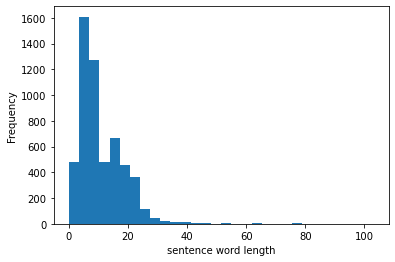

In [71]:
# check the distribution of the number of sentence word length 
length_list=[] 
for i in x: 
    length_list.append(len(i))

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.hist(length_list, density=False, bins=30)  # `density=False` would make counts
plt.ylabel('Frequency')
plt.xlabel('sentence word length')

Most sentence have less than 40 words, so I set 40 for the padding max length. 

In [72]:
# padding 
maxlen=40
x = pad_sequences(x, padding='post', maxlen=maxlen)

In [73]:
import sklearn
# split training and testing set 
x_train, x_test, y_train, y_test  = sklearn.model_selection.train_test_split(x, y, test_size=0.2, random_state=0)

In [74]:
# check the vocabulary size 
vocab_size = len(tokenizer.word_index)+1
vocab_size

7994

In [78]:
## RNN with LSTM
model3 = tfk.Sequential()
model3.add(tfkl.Embedding(vocab_size, 32, input_length=40))
model3.add(tfkl.LSTM(128,return_sequences=True))
model3.add(tfkl.GlobalMaxPool1D())
model3.add(tfkl.Dropout(0.4))
model3.add(tfkl.Dense(64,activation="relu"))
model3.add(tfkl.Dropout(0.4))
model3.add(tfkl.Dense(1,activation="sigmoid"))
model3.compile(loss='binary_crossentropy', optimizer=tfk.optimizers.RMSprop(lr=0.01),metrics=['accuracy'])
model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 40, 32)            255808    
_________________________________________________________________
lstm_2 (LSTM)                (None, 40, 128)           82432     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 128)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

In [80]:
model3.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Train on 4457 samples, validate on 1115 samples
Epoch 1/5
4457/4457 [==============================] - 4s 981us/sample - loss: 0.3002 - accuracy: 0.9114 - val_loss: 0.2086 - val_accuracy: 0.9471
Epoch 2/5
4457/4457 [==============================] - 2s 484us/sample - loss: 0.1307 - accuracy: 0.9650 - val_loss: 0.1596 - val_accuracy: 0.9596
Epoch 3/5
4457/4457 [==============================] - 2s 487us/sample - loss: 0.0446 - accuracy: 0.9883 - val_loss: 0.0507 - val_accuracy: 0.9874
Epoch 4/5
4457/4457 [==============================] - 2s 505us/sample - loss: 0.0155 - accuracy: 0.9960 - val_loss: 2.5824 - val_accuracy: 0.7632
Epoch 5/5
4457/4457 [==============================] - 2s 531us/sample - loss: 0.0185 - accuracy: 0.9962 - val_loss: 0.1003 - val_accuracy: 0.9865


The accuracy on test set is 0.9865

In [83]:
# calculation for ROC viz
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
pred_y_rnn = model3.predict(x_test).ravel()
fpr_rnn, tpr_rnn, rnn_ = roc_curve(y_test, pred_y_rnn)
auc_rnn = auc(fpr_rnn, tpr_rnn)
auc_rnn

0.9881544502617802

### 3.2 CNN

In [85]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
from keras.layers import Dense, SimpleRNN, LSTM, Embedding
from keras.models import Sequential

In [87]:
data=pd.read_csv("SPAM_detection.csv")
x = data['Message']
y = data['category_val']

# try character level embedding 
tokenizer = Tokenizer(filters=None, char_level=True)
tokenizer.fit_on_texts(x)
x = tokenizer.texts_to_sequences(x)

Text(0.5, 0, 'sentence character length')

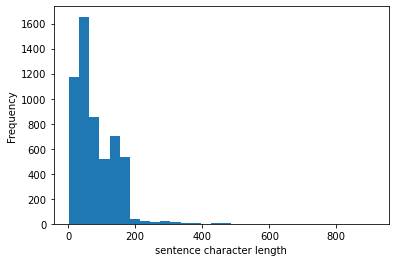

In [88]:
# check the distribution of the number of sentence character length 
length_list=[] 
for i in x: 
    length_list.append(len(i))

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.hist(length_list, density=False, bins=30)  # `density=False` would make counts
plt.ylabel('Frequency')
plt.xlabel('sentence character length')

Most sentences have less than 200 characters, so I set padding max length as 200

In [89]:
max_features = 500
maxlen =200
x = sequence.pad_sequences(x, maxlen)

In [90]:
x_train, x_test, y_train, y_test  = sklearn.model_selection.train_test_split(x, y, test_size=0.2, random_state=0)

x_train.shape

(4457, 200)

In [91]:
from keras.layers.convolutional import Conv1D
from keras.layers import SpatialDropout1D, MaxPool1D
from keras.models import Sequential 
from keras.optimizers import Adam

In [92]:
model_CNN = Sequential()
model_CNN.add(Embedding(max_features, 128, input_length = maxlen))

model_CNN.add(Conv1D(128,activation='relu', kernel_size=3,padding='valid'))
model_CNN.add(SpatialDropout1D(0.1))
model_CNN.add(MaxPool1D())

model_CNN.add(Conv1D(64,activation='relu', kernel_size=3,padding='valid'))
model_CNN.add(SpatialDropout1D(0.2))
model_CNN.add(MaxPool1D())

model_CNN.add(Conv1D(32,activation='relu', kernel_size=2,padding='valid'))
model_CNN.add(SpatialDropout1D(0.2))
model_CNN.add(MaxPool1D())

model_CNN.add(Flatten())
model_CNN.add(Dense(1, activation='sigmoid'))
model_CNN.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 128)          64000     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 198, 128)          49280     
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 198, 128)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 99, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 97, 64)            24640     
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 97, 64)            0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 48, 64)           

In [94]:
model_CNN.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [95]:
model_CNN.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 4457 samples, validate on 1115 samples
Epoch 1/5
4457/4457 [==============================] - 4s 983us/step - loss: 0.3130 - accuracy: 0.8739 - val_loss: 0.2623 - val_accuracy: 0.8565
Epoch 2/5
4457/4457 [==============================] - 4s 890us/step - loss: 0.1847 - accuracy: 0.9309 - val_loss: 0.1155 - val_accuracy: 0.9570
Epoch 3/5
4457/4457 [==============================] - 4s 924us/step - loss: 0.0921 - accuracy: 0.9742 - val_loss: 0.0722 - val_accuracy: 0.9803
Epoch 4/5
4457/4457 [==============================] - 4s 923us/step - loss: 0.0767 - accuracy: 0.9769 - val_loss: 0.0577 - val_accuracy: 0.9830
Epoch 5/5
4457/4457 [==============================] - 4s 935us/step - loss: 0.0665 - accuracy: 0.9818 - val_loss: 0.0533 - val_accuracy: 0.9839


The accuracy on test set is 0.9839

In [96]:
# Calculation for ROC Viz
pred_y_cnn = model_CNN.predict(x_test).ravel()
fpr_cnn, tpr_cnn, cnn_ = roc_curve(y_test, pred_y_cnn)
auc_cnn = auc(fpr_cnn, tpr_cnn)
auc_cnn

0.9932395287958116

### 3.3 ROC

In [98]:
from sklearn.metrics import roc_curve, auc

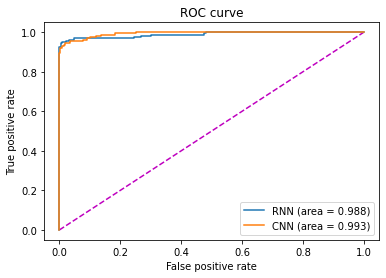

In [99]:
plt.figure()
plt.plot([0, 1], [0, 1], 'm--')
plt.plot(fpr_rnn, tpr_rnn, label='RNN (area = {:.3f})'.format(auc_rnn))
plt.plot(fpr_cnn, tpr_cnn, label='CNN (area = {:.3f})'.format(auc_cnn))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc = 'lower right')
plt.show()